# Libraries and modules

In [1]:
# Data processing libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Styles
sns.set_theme(style='white', palette=None)
plt.style.use('seaborn')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'

plt.rcParams['axes.titlesize'] = 25
plt.rcParams['figure.titlesize'] = 25
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['font.size'] = 15

/tmp/ipykernel_5462/3327244542.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


# Data preprocessing

In [71]:
df_train = pd.read_csv('datasets/fraudTrain.csv')
df_train.drop_duplicates(inplace=True)
df_train.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,40.3750,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,37.9931,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,38.8432,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,40.3359,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,36.5220,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0


In [57]:
df_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

In [72]:
df_train.drop(['Unnamed: 0'], axis=1, inplace=True)
df_train.rename(columns={'trans_date_trans_time':'transaction_time', 'cc_num':'card_number', 'amt':'amount(usd)', 'trans_num':'transaction_id'}, inplace=True)

df_train['transaction_time'] = pd.to_datetime(df_train['transaction_time'],infer_datetime_format=True)
df_train['dob'] = pd.to_datetime(df_train['dob'], infer_datetime_format=True)

df_train['time'] = df_train['unix_time'].apply(datetime.utcfromtimestamp)
df_train.drop('unix_time', axis=1, inplace=True)

df_train['hour_of_day'] = df_train.time.dt.hour
df_train['age'] = (pd.to_datetime('today') - df_train['dob']).astype('<m8[Y]')

df_train.head(10)

,transaction_time,card_number,merchant,category,amount(usd),first,last,gender,street,city,...,city_pop,job,dob,transaction_id,merch_lat,merch_long,is_fraud,time,hour_of_day,age
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0,2012-01-01 00:00:18,0,34.0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0,2012-01-01 00:00:44,0,44.0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0,2012-01-01 00:00:51,0,60.0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,47.034331,-112.561071,0,2012-01-01 00:01:16,0,55.0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,38.674999,-78.632459,0,2012-01-01 00:03:06,0,36.0
5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,Dublin,...,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,40.653382,-76.152667,0,2012-01-01 00:04:08,0,61.0
6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,Holcomb,...,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,37.162705,-100.153370,0,2012-01-01 00:04:42,0,29.0
7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,Edinburg,...,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,38.948089,-78.540296,0,2012-01-01 00:05:08,0,75.0
8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,Manor,...,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,40.351813,-79.958146,0,2012-01-01 00:05:18,0,81.0
9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,Clarksville,...,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,37.179198,-87.485381,0,2012-01-01 00:06:01,0,48.0


In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   transaction_time  1296675 non-null  datetime64[ns]
 1   card_number       1296675 non-null  int64         
 2   merchant          1296675 non-null  object        
 3   category          1296675 non-null  object        
 4   amount(usd)       1296675 non-null  float64       
 5   first             1296675 non-null  object        
 6   last              1296675 non-null  object        
 7   gender            1296675 non-null  object        
 8   street            1296675 non-null  object        
 9   city              1296675 non-null  object        
 10  state             1296675 non-null  object        
 11  zip               1296675 non-null  int64         
 12  lat               1296675 non-null  float64       
 13  long              1296675 non-null  float6

# Exploratory Data Analysis

## 1. Correlation

/tmp/ipykernel_4086/3849898425.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_train.corr(), mask=np.triu(np.ones_like(df_train.corr())), xticklabels=df_train.corr().columns, yticklabels=df_train.corr().columns, cmap='coolwarm', center=0, annot=True)


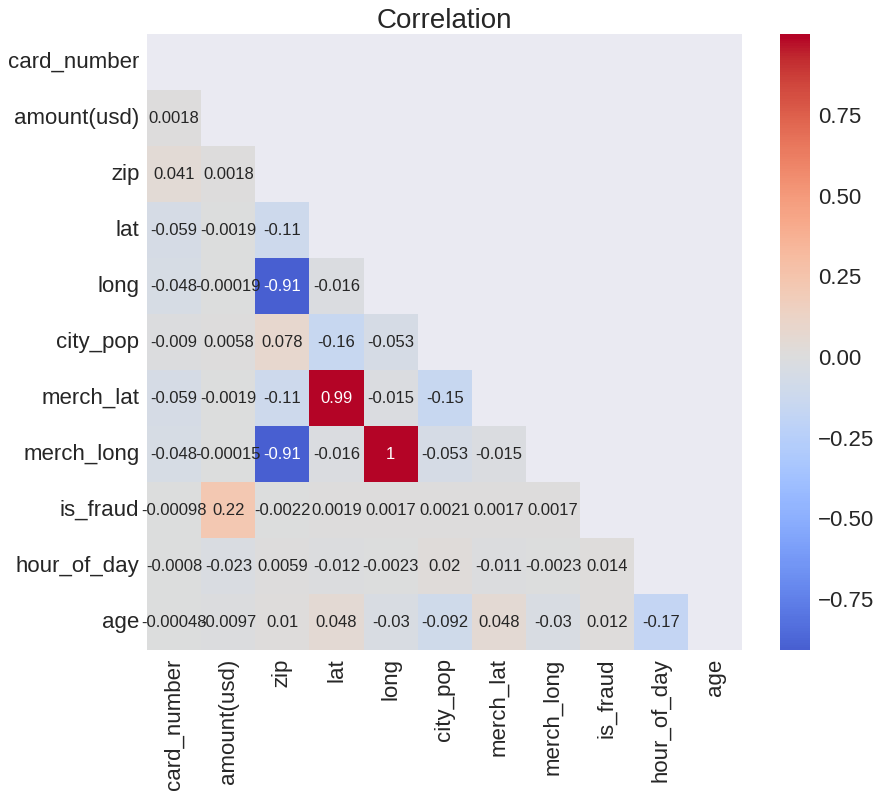

In [61]:
plt.figure(figsize=(12, 10), dpi=80)
sns.heatmap(df_train.corr(), mask=np.triu(np.ones_like(df_train.corr())), xticklabels=df_train.corr().columns, yticklabels=df_train.corr().columns, cmap='coolwarm', center=0, annot=True)

plt.title('Correlation')
plt.show()

#### Из этой картинки ничего полезного выяснить не получится, так как данные очень несбалансированы. Докажем это позже. Просто для сравнения потом приведем это здесь.


## 2. Fraud persent

In [62]:
vals = [len(df_train[df_train['is_fraud'] == 1]), len(df_train[df_train['is_fraud'] == 0])]
labels = ['Fraud', 'Ok']

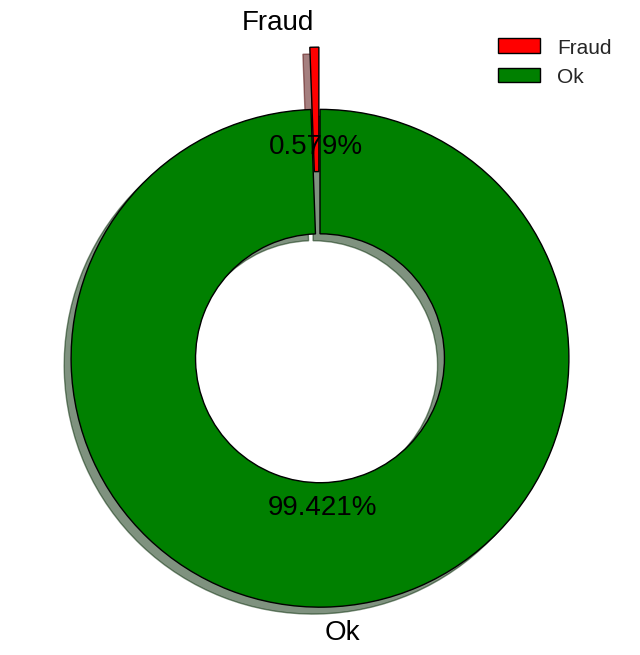

In [63]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(vals, labels=labels, startangle=90, autopct='%.3f%%', colors=['r', 'g'], shadow=True, explode=(0.1, 0.15), wedgeprops={'width':0.5, 'edgecolor':'k', 'linewidth': 1}, textprops={'color':'k', 'size':20})
ax.axis('equal')
plt.legend()

plt.show()

## 3. Male vs Female fraud

In [64]:
male_fraud = len(df_train[(df_train['is_fraud'] == 1) & (df_train['gender']=='M')])
female_fraud = len(df_train[(df_train['is_fraud'] == 1) & (df_train['gender']=='F')])

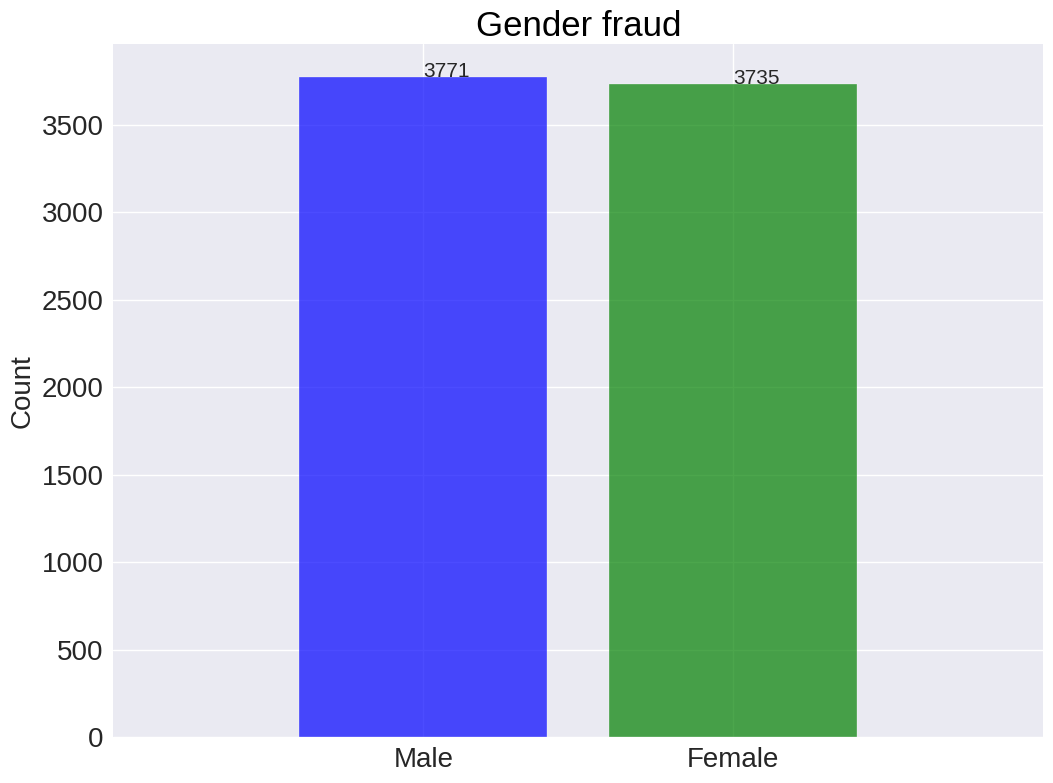

In [65]:
fig, ax = plt.subplots(figsize=(12, 9))
ax.set_title('Gender fraud', color='k')
ax.set_ylabel('Count')

ax.bar(['Male', 'Female'], [male_fraud, female_fraud], color=['b', 'g'], alpha=0.7)
plt.text(0, male_fraud, male_fraud)
plt.text(1, female_fraud, female_fraud)
plt.xlim([-1, 2])

ax.grid(True)
plt.show()

## 4. Age and fraud

In [66]:
df_male = df_train[(df_train['gender'] == 'M') & (df_train['is_fraud'] == 1)][['gender', 'age', 'is_fraud']]
df_female = df_train[(df_train['gender'] == 'F') & (df_train['is_fraud'] == 1)][['gender', 'age', 'is_fraud']]

male_ages = pd.DataFrame(df_male.groupby('age').sum('is_fraud')).index
male_count = pd.DataFrame(df_male.groupby('age').sum('is_fraud')).values

female_ages = pd.DataFrame(df_female.groupby('age').sum('is_fraud')).index
female_count = pd.DataFrame(df_female.groupby('age').sum('is_fraud')).values

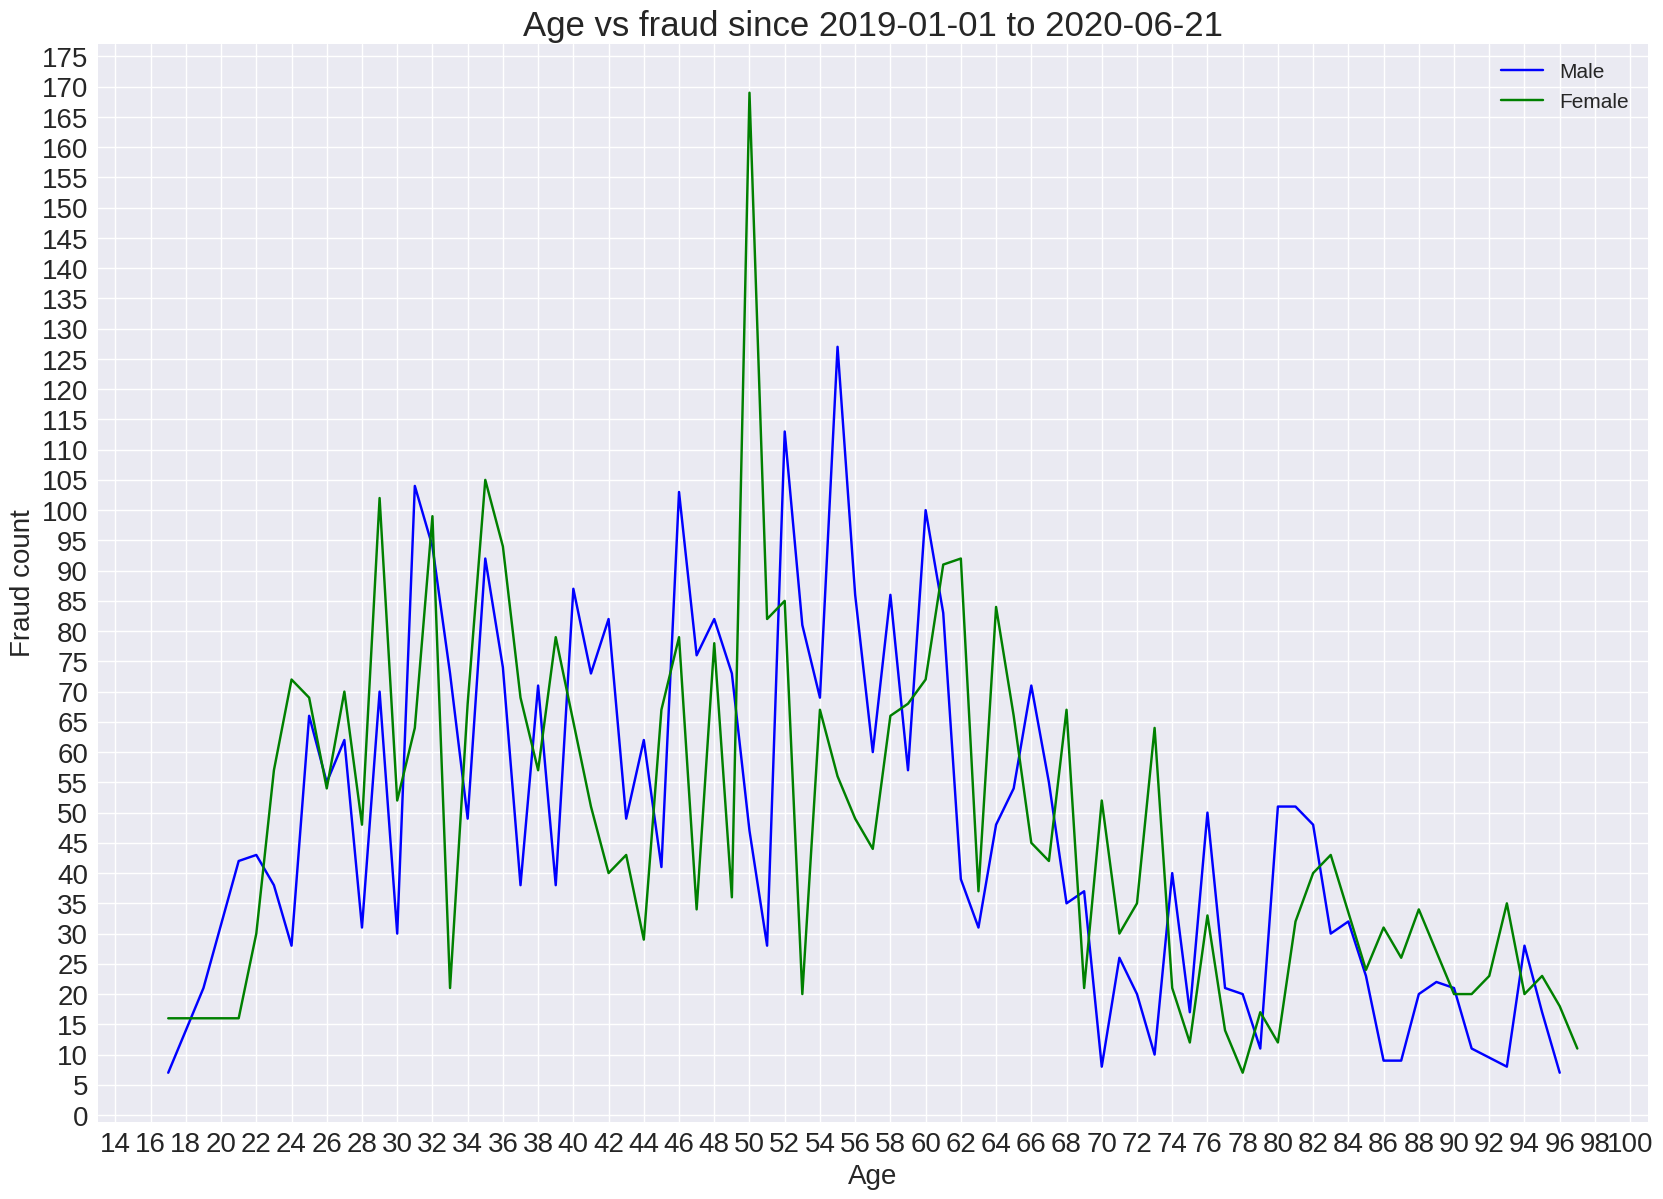

In [67]:
fig, ax = plt.subplots(figsize=(20,14))
ax.set_title(f"Age vs fraud since {df_train['transaction_time'].min().date()} to {df_train['transaction_time'].max().date()}")
ax.set_xlabel('Age')
ax.set_ylabel('Fraud count')

ax.plot(male_ages, male_count, c='b', label='Male')
ax.plot(female_ages, female_count, c='g', label='Female')

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(1))

ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

plt.legend()
plt.grid(visible=True)
plt.show()

In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   transaction_time  1296675 non-null  datetime64[ns]
 1   card_number       1296675 non-null  int64         
 2   merchant          1296675 non-null  object        
 3   category          1296675 non-null  object        
 4   amount(usd)       1296675 non-null  float64       
 5   first             1296675 non-null  object        
 6   last              1296675 non-null  object        
 7   gender            1296675 non-null  object        
 8   street            1296675 non-null  object        
 9   city              1296675 non-null  object        
 10  state             1296675 non-null  object        
 11  zip               1296675 non-null  int64         
 12  lat               1296675 non-null  float64       
 13  long              1296675 non-null  float6

In [69]:
(df_train['transaction_time'].min(),
df_train['transaction_time'].max())

(Timestamp('2019-01-01 00:00:18'), Timestamp('2020-06-21 12:13:37'))